**Graduation Project**: PM Footprint calculator based on citizen behavior related to fine dust emissions.

Student: **Alessandro Monolo** | 1790210

GP supervisor: Angelique Ruiter

Master Data-Driven Design, Hogeschool Utrecht.

Academical Year: 2021/2022, Block C.

In [111]:
# Import the Python Libraries I need to visualize the overall Z - Score index among the survey voters:

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from matplotlib import cm
import joypy as joypy
%matplotlib inline

In [113]:
# Import the final index dataframe with the name: df_index

In [114]:
df_index = pd.read_csv("df_index.csv")

In [115]:
# Quick overview over the final dataframe:

In [116]:
#print(df_index.head(10))
#print(df_index.shape)
#print(df_index.info())

In [117]:
# Check any missing values over the final index dataframe:

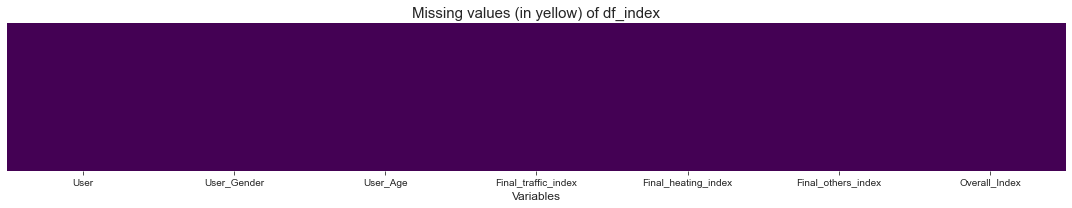

In [118]:
plt.figure(figsize=(15,3))
sns.heatmap(df_index.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing values (in yellow) of df_index', size=15)
plt.xlabel('Variables', size=12)
plt.tight_layout()
plt.show()

## 4 - Z - Score Index Visualization:

In [119]:
# Now It is visualized the overall index scores distribution:

In [120]:
# Here I create four new variables, representing each one a different df_index stats - Mean, Median, Min and Max values:

In [121]:
score_mean = df_index['Overall_Index'].mean()
score_median = df_index['Overall_Index'].median()
score_min = df_index['Overall_Index'].min()
score_max = df_index['Overall_Index'].max()

In [122]:
# here I plot the histogram representing the overall index given by each Z - Score produced by the voters,
# Which represent hte impact of thier consuption and behavior towards PM monthly emissions.
# Lowest values represent a lower impact than the higher ones:

C:\Users\aless\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aless\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


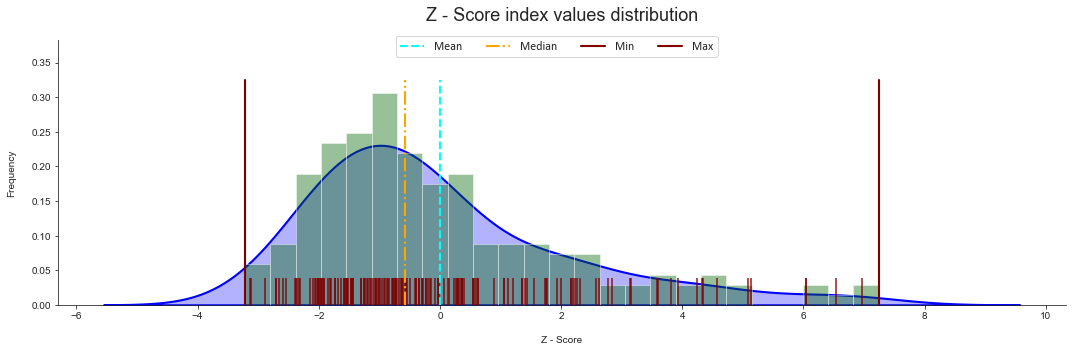

In [123]:
plt.figure(figsize=(15, 5))
sns.set_style('ticks')

sns.distplot(x=df_index["Overall_Index"],
            kde=True,
            kde_kws={"color": "blue", "alpha": 0.3, "linewidth": 2.1, "shade": True},
            bins=25,
            rug=True,
            rug_kws={"color": "maroon", "alpha": 0.75, "linewidth": 1.8, "height":0.1},
            color='darkgreen')

# This adds a vertical line at x-position mean value:
plt.axvline(score_mean, 0, 0.85, color='aqua', label='Mean', lw=2.1, linestyle='dashed') 
# This adds a vertical line at x-position median value:
plt.axvline(score_median, 0, 0.85, color='orange', label='Median', lw=2.1, linestyle='dashdot')
# This adds a vertical line at x-position min value:
plt.axvline(score_min, 0, 0.85, color='maroon', label='Min', lw=2.1, linestyle='solid') 
# This adds a vertical line at x-position max value:
plt.axvline(score_max, 0, 0.85, color='maroon', label='Max', lw=2.1, linestyle='solid') 

plt.title("Z - Score index values distribution", y= 1.05, x= 0.5, fontsize= 18)
plt.xlabel("Z - Score", labelpad= 15)
plt.ylabel("Frequency", labelpad= 15)

legend = plt.legend(loc='center',
                    frameon=True,
                    bbox_to_anchor=(0., 0.925, 0.99, .102),  
                    ncol=4, 
                    borderaxespad=-.16,
                    prop={'size': 12, 'family':'Calibri'})

sns.despine(left=False, bottom=False, top=True, right=True)
plt.tight_layout()
plt.show()

In [124]:
# Most of the Z scores are around -2.0 and 0.0.
# They represents an overall good parameters, since highest is the score, highest is the impact towards PM Emissions.
# Min Value is equal to -3.22 and the max value is equal to +7.24.
# There is a long skew on the right and the overall distribution is modal, with the highest point around -1.0.
# The mean value is approximately 0.0.

In [125]:
# here I plot the gender distribution index of the Z - Scores scored by the survey participants,
# which represents the overall impact among the variables concerning PM emissions given my their answers:

In [126]:
# To do that, I also create three new sub-dataframe, one for each gender:

In [127]:
df_index_women = df_index.loc[(df_index["User_Gender"] == 'Woman')]
df_index_men = df_index.loc[(df_index["User_Gender"] == 'Man')]
df_index_nonbinary = df_index.loc[(df_index["User_Gender"] == 'Non-Binary')]

In [128]:
# In order to find the mean values of each gender Z - Score:

In [129]:
women_score_mean = df_index_women['Overall_Index'].mean()
men_score_mean = df_index_men['Overall_Index'].mean()
nonbinary_score_mean = df_index_nonbinary['Overall_Index'].mean()

In [130]:
# Here I create the histplot in order to visualize how the bins,
# divided by gender, are spreaded among the Z - Score values:

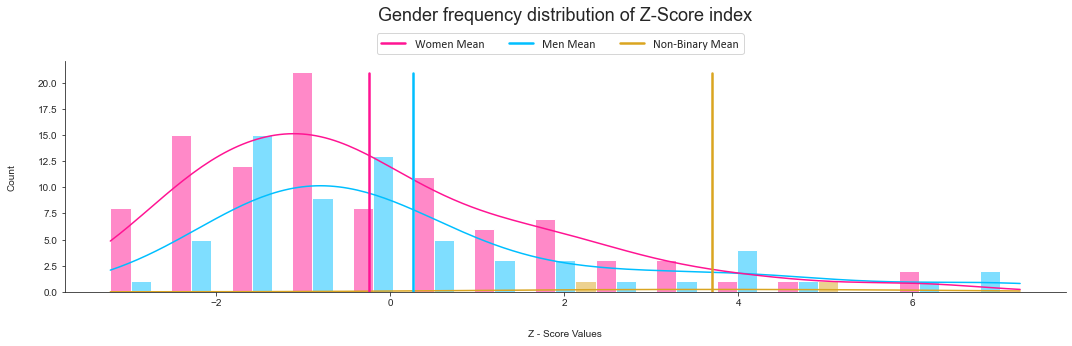

In [131]:
plt.figure(figsize=(15,5))
sns.set_style('ticks')

color_2 = ["deeppink", "deepskyblue", "goldenrod"]
sns.histplot(data=df_index, x="Overall_Index", hue="User_Gender", multiple="dodge", palette=color_2, bins=15, kde=True)

# This adds a vertical line at x-position mean value for gender - Women:
plt.axvline(women_score_mean, 0, 0.95, color='deeppink', label='Women Mean', lw=2.5, linestyle='solid') 
# This adds a vertical line at x-position mean value for gender - Men:
plt.axvline(men_score_mean, 0, 0.95, color='deepskyblue', label='Men Mean', lw=2.5, linestyle='solid')
# This adds a vertical line at x-position mean value for gender - Non-Binary:
plt.axvline(nonbinary_score_mean, 0, 0.95, color='goldenrod', label='Non-Binary Mean', lw=2.5, linestyle='solid')

legend = plt.legend(loc='center', frameon=True, bbox_to_anchor=(0., 1.025, 0.99, .102),
                    ncol=4, borderaxespad=-.16, prop={'size': 12, 'family':'Calibri'})

plt.title("Gender frequency distribution of Z-Score index", y= 1.15, x= 0.5, fontsize= 18)
plt.xlabel("Z - Score Values", labelpad=22)
plt.ylabel("Count", labelpad=22)

sns.despine(left=False, bottom=False, top=True, right=True)
plt.tight_layout()
plt.show()

In [132]:
# From this plot is possible to visualize how the Women voters scored lower Z scores than Men.
# Both trend are modals.
# Mean Men value is higher than the Women one, again, representing a stats where clearly Men scored worse index then Women.

### Rank Z Score Index from 0 to 1 to values:
**Using .Rank Pandas function**

In [133]:
# Create new df_index column with the name of Rank where all the values from the column Overall_Index are normalized
# and ranked from 0 (the lowest) to 1 (the highest):

In [134]:
#df_index['Rank'] = df_index['Overall_Index'].rank(ascending=True, pct=True)

In [135]:
df_index['Rank'] = df_index['Overall_Index'].rank(ascending=False, pct=True)

In [136]:
# Here I check of what correspond the min and max values of the Rank and Overall_Index dataframe columns:

In [137]:
df_min_row = df_index.loc[df_index['Overall_Index'] == score_min]
df_max_row = df_index.loc[df_index['Overall_Index'] == score_max]

In [138]:
df_min_row

,User,User_Gender,User_Age,Final_traffic_index,Final_heating_index,Final_others_index,Overall_Index,Rank
70,71,Woman,18 - 24,-0.72,-2.08,-0.41,-3.22,1.0


In [139]:
df_max_row

,User,User_Gender,User_Age,Final_traffic_index,Final_heating_index,Final_others_index,Overall_Index,Rank
11,12,Man,18 - 24,0.35,6.24,0.64,7.24,0.006098


In [140]:
# The min Overall_Index value (- 3,22) corresponds to 0.006098 Rank and represents the user N. 71;
# The max Overall_Index value (+ 7,24) corresponds to 1.0 Rank and represents the user N. 12.

In [141]:
# This aims to check if the min and max rows correspond to the ones obtained
# within the file N. 3 (Z Score Index Calculator Sub-dataframes %)

### Obtain the Rank from 0 to 100 multiplying the df_index Rank per 100:

In [142]:
# Here I create a new df_index column multiplying the rank column x 100:

In [143]:
df_index['Rank_0_100'] = df_index['Rank']*100

In [144]:
# And then rounding the same column with only 2 decimals:

In [145]:
df_index['Rank_0_100'] = df_index['Rank_0_100'].round(2)

In [146]:
# Drop the obsolete df_index column Rank:

In [147]:
df_index = df_index.drop(["Rank"], axis=1)

In [148]:
# Here I sort the whole dataframe using as ascending parameter the values contained within the Rank_0_100 df column:

In [149]:
df_index = df_index.sort_values(by=['Rank_0_100'], ascending=False)

In [150]:
# The final dataframe is now saved as df_rank into a new csv file:

In [151]:
df_index.to_csv('df_rank.csv', index=False)

In [152]:
# Here I read the just saved dataframe and I quick check of the df_rank csv file:

In [153]:
df_rank = pd.read_csv("df_rank.csv")

In [154]:
# It is now possible to clearly see how the ones who scored a low Z score value obtained higher
# Rank and who scored a high Z score obtained the opposite result, being closer to 0 rank.

In [155]:
df_rank

,User,User_Gender,User_Age,Final_traffic_index,Final_heating_index,Final_others_index,Overall_Index,Rank_0_100
0,71,Woman,18 - 24,-0.72,-2.08,-0.41,-3.22,100.00
1,69,Woman,18 - 24,-0.62,-2.19,-0.33,-3.14,99.39
2,137,Man,31 - 40,-0.47,-2.24,-0.41,-3.12,98.78
3,1,Woman,18 - 24,-0.72,-2.40,0.25,-2.88,98.17
4,10,Woman,51 - 60,-0.72,-1.77,-0.23,-2.71,97.26
...,...,...,...,...,...,...,...,...
159,164,Woman,18 - 24,-0.01,5.46,0.60,6.05,2.74
160,158,Woman,18 - 24,-0.01,5.46,0.60,6.05,2.74
161,79,Man,25 - 30,0.64,5.74,0.15,6.54,1.83
162,30,Man,25 - 30,0.08,6.27,0.61,6.96,1.22


<Figure size 2880x1800 with 0 Axes>

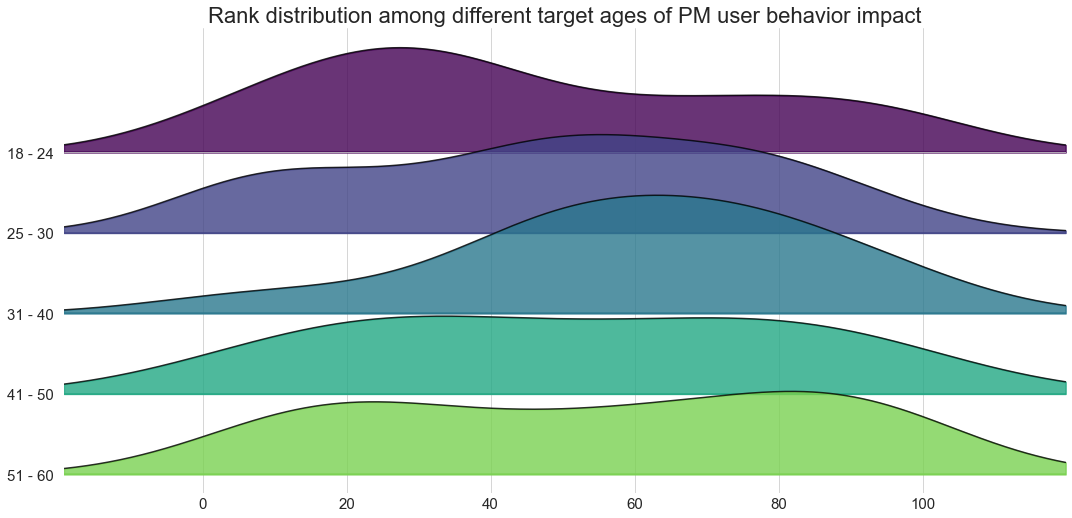

In [200]:
plt.figure(figsize=(16,10), dpi= 180)

fig, axes = joypy.joyplot(df_index,
                          column=["Rank_0_100"],
                          by="User_Age",
                          figsize=(15,7),
                          grid='both',
                          fill='true',
                          alpha=0.8,
                          linewidth=1.5,
                          linecolor='k',
                          colormap=cm.viridis,
                          xlabelsize=15,
                          ylabelsize=15,
                          overlap=1.25,
                          background='w')

plt.title('Rank distribution among different target ages of PM user behavior impact', fontsize=22)
plt.show()

<Figure size 2880x1800 with 0 Axes>

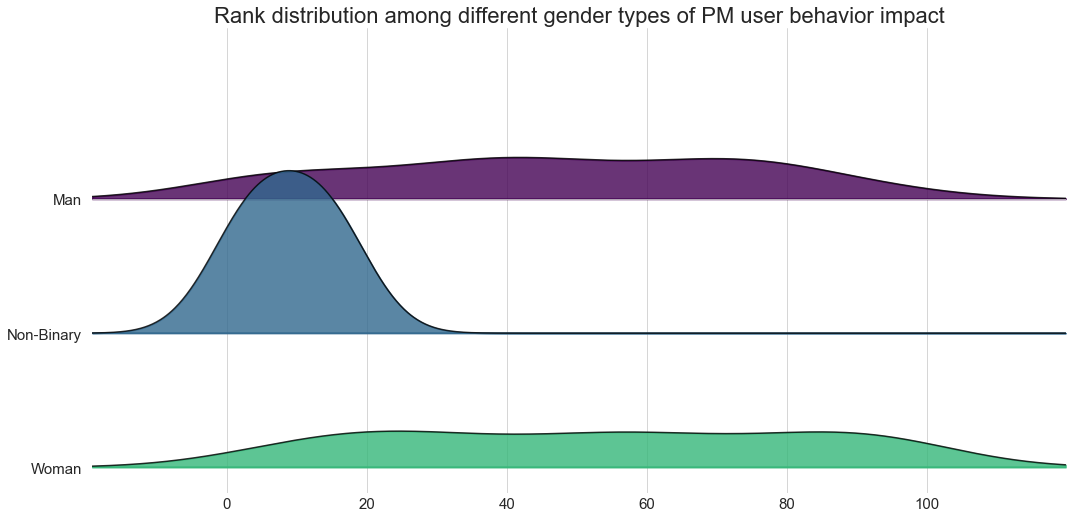

In [201]:
plt.figure(figsize=(16,10), dpi= 180)

fig, axes = joypy.joyplot(df_index,
                          column=["Rank_0_100"],
                          by="User_Gender",
                          figsize=(15,7),
                          grid='both',
                          fill='true',
                          alpha=0.8,
                          linewidth=1.5,
                          linecolor='k',
                          colormap=cm.viridis,
                          xlabelsize=15,
                          ylabelsize=15,
                          overlap=1.25,
                          background='w')

plt.title('Rank distribution among different gender types of PM user behavior impact', fontsize=22)
plt.show()